# Embedding Matplotlib Animations in Jupyter Notebooks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

from IPython.display import HTML 

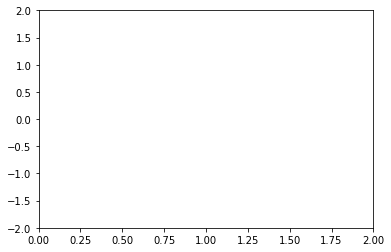

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
line, = ax.plot([], [], lw=2)

In [4]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [6]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [7]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [8]:
HTML(anim.to_html5_video())

In [11]:
# no amination from the inline display...
anim._repr_html_() is None
anim

In [15]:
# ... but this can be forced by setting the diplay method to html5
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim